In [1]:
import gym

import onnxruntime
import numpy as np
import matplotlib.pyplot as plt

from itertools import count
import time

from IPython import display

In [2]:
def plot(episode_durations: list[int], title: str):
    plt.figure(1)
    plt.clf()
    plt.title(title)
    plt.xlabel('episodes')
    plt.ylabel('duration (steps)')
    plt.plot(episode_durations)
    plt.pause(.001)

def plot_diagram(rewards: list[int], title: str, display_trigger: bool):
    has_rewards_sum = sum(rewards)
    no_rewards_sum = len(rewards) - has_rewards_sum
    sizes = [no_rewards_sum, has_rewards_sum]
    labels = ['no rewards', 'got rewards']  # Convert labels to a list
    colors = ['orange', 'green']  # Convert colors to a list
    plt.figure(1)
    plt.clf()
    plt.title(title)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
    if display_trigger: display.display(plt.gcf())

In [7]:
num_episodes = 20_000

models_path = 'onnx'
model_appendix = '_%d' % num_episodes
model_format = '.onnx'
policy_net_path = models_path + '/frozen_lake_tf_policy_net' + model_appendix + model_format
target_net_path = models_path + '/frozen_lake_tf_target_net' + model_appendix + model_format

In [8]:
policy_net = onnxruntime.InferenceSession(policy_net_path)
input_name = policy_net.get_inputs()[0].name
# target_net = onnxruntime.InferenceSession(target_net_path)

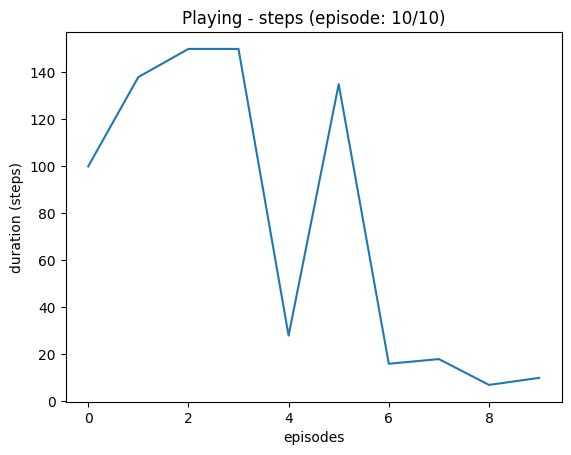

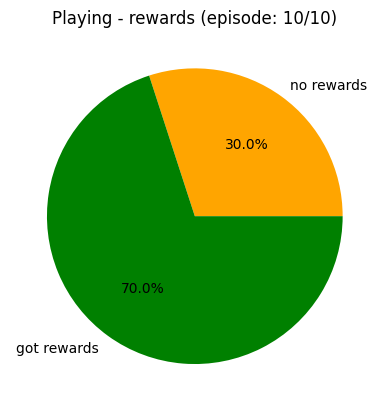

In [9]:
env = gym.make('FrozenLake-v1', render_mode='human')

episode_durations = list()
episode_rewards = list()
episodes_to_play = 10
spets_per_episode = 150

for episode in range(episodes_to_play):
    state, observation = env.reset()
    done = False
    rewards_per_episode = 0
    # time.sleep(1)
    for timestep in count():
        env.render()

        state_input = np.array([[state]], dtype=np.float32)
        outputs = policy_net.run(None, { input_name: state_input })
        action = np.argmax(outputs[0], axis=1)[0]

        next_state, reward, done, truncated, info = env.step(action)
        # done = truncated if truncated else done
        done = done if timestep < spets_per_episode else True
        state = next_state
        rewards_per_episode += reward

        if done:
            episode_durations.append(timestep)
            episode_rewards.append(rewards_per_episode)
            display.clear_output()
            episode_num = episode + 1
            plot(episode_durations, title=f'Playing - steps (episode: {episode_num}/{episodes_to_play})')
            plot_diagram(episode_rewards, title=f'Playing - rewards (episode: {episode + 1}/{episodes_to_play})', display_trigger=(episode_num < episodes_to_play))
            break

In [10]:
env.close()